# Fifa 20-23 Tracker

## Introduction
The Dataset 'male_players_23.csv' includes the available player data for the Fifa Career Mode from FIFA 20 to FIFA 23.  
The data allows multiple types comparisons for the same / different players across the last 4 versions of the videogame.   
The Dataset has a total of 3561639 different player entries with over 110 different attributes, resulting in 358,780,400 values being imported, inspected, processed and visualised.  
 
By: Mathushan Shanthan


## Objective  
My objective is to clean and prepare the Data due to the raw data being very unorganised.  
I will then move on to finding insights about the data and elaborate in the form of visualisation to demonstrate key findings.BUILDER

I will be visualising:  
- Comparison of Messi / Ronaldo Attacking Finishing Over Time  
- Overall Player Rating Distribution  
- Top 10 Nationality Distribution of Players  
- Correlation Heatmap Between Player Attributes  
- Player Nationality Distribution on World Map  
- Average Overall vs Potentional Ratings  
  
I will also be implementing my own PREMIER LEAGUE SQUAD BUILDER algorithm that takes into account Budget, Formation and Overall Rating.

## Importing Packages 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# 1. DATA IMPORT

### Import Dataset

In [2]:
df = pd.read_csv('male_players_23.csv')
df

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/230009,23,9,2023-01-13,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,...,63+3,63+3,64+3,59+3,50+3,50+3,50+3,59+3,19+3,https://cdn.sofifa.net/players/158/023/23_120.png
1,165153,/player/165153/karim-benzema/230009,23,9,2023-01-13,K. Benzema,Karim Benzema,"CF, ST",91,91,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,https://cdn.sofifa.net/players/165/153/23_120.png
2,188545,/player/188545/robert-lewandowski/230009,23,9,2023-01-13,R. Lewandowski,Robert Lewandowski,ST,91,91,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/23_120.png
3,192985,/player/192985/kevin-de-bruyne/230009,23,9,2023-01-13,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,79+3,79+3,78+3,74+3,68+3,68+3,68+3,74+3,21+3,https://cdn.sofifa.net/players/192/985/23_120.png
4,231747,/player/231747/kylian-mbappe/230009,23,9,2023-01-13,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561635,247220,/player/247220/nasser-al-dajani/200009,20,9,2019-11-06,N. Al Dajani,Nasser Al-Daajani,"CAM, CM",56,67,...,46+2,46+2,47+2,47+2,42+2,42+2,42+2,47+2,15+2,https://cdn.sofifa.net/players/247/220/20_120.png
3561636,247237,/player/247237/moritz-romling/200009,20,9,2019-11-06,M. Römling,Moritz Römling,"LB, LM, LWB",56,78,...,49+2,49+2,55+2,55+2,54+2,54+2,54+2,55+2,14+2,https://cdn.sofifa.net/players/247/237/20_120.png
3561637,247241,/player/247241/shaocong-wu/200009,20,9,2019-11-06,Wu Shaocong,吴少聪,"CM, LM, CB",56,69,...,56+2,56+2,58+2,58+2,57+2,57+2,57+2,58+2,13+2,https://cdn.sofifa.net/players/247/241/20_120.png
3561638,247268,/player/247268/shunki-higashi/200009,20,9,2019-11-06,S. Higashi,東 俊希,"CM, CAM, RW",56,70,...,52+2,52+2,53+2,51+2,49+2,49+2,49+2,51+2,15+2,https://cdn.sofifa.net/players/247/268/20_120.png


# 2. DATA INSPECTION

### Filter Dataframe to find all of Cristiano Ronaldos Cards

In [3]:
# Filter the DataFrame to find all rows where the "short_name" column is equal to "Cristiano Ronaldo"
cristiano_ronaldo = df[df['short_name'] == 'Cristiano Ronaldo']

# Convert the filtered DataFrame to an HTML table
html_table = cristiano_ronaldo.to_html(index=False)

# Display the HTML table
display(HTML(html_table))

player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
20801,/player/20801/c-ronaldo-dos-santos-aveiro/230009,23,9,2023-01-13,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,88,88,31000000.0,86000.0,37,1985-02-05,187,83,350.0,Pro League,1.0,112139.0,Al Nassr,ST,7.0,NaN,2023-01-01,2025.0,38.0,Portugal,1354.0,ST,7.0,Right,4.0,5.0,5.0,High/Low,Unique,Yes,52700000.0,"#Distance Shooter, #Clinical Finisher","Power Free-Kick, Flair, Long Shot Taker (AI), Outside Foot Shot",79.0,91.0,76.0,83.0,34.0,72.0,78.0,91.0,89.0,78.0,85.0,81.0,79.0,75.0,70.0,87.0,76.0,82.0,77.0,90.0,67.0,93.0,95.0,70.0,75.0,88.0,62.0,29.0,93.0,76.0,90.0,94.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,NaN,87+1,87+1,87+1,84,86,86,86,84,83+3,83+3,83+3,82+3,75+3,75+3,75+3,82+3,60+3,58+3,58+3,58+3,60+3,57+3,52+3,52+3,52+3,57+3,20+3,https://cdn.sofifa.net/players/020/801/23_120.png
20801,/player/20801/c-ronaldo-dos-santos-aveiro/230008,23,8,2022-12-17,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,88,88,NaN,NaN,37,1985-02-05,187,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,Portugal,1354.0,ST,7.0,Right,4.0,5.0,5.0,High/Low,Unique,Yes,NaN,"#Distance Shooter, #Clinical Finisher","Power Free-Kick, Flair, Long Shot Taker (AI), Outside Foot Shot",79.0,91.0,76.0,83.0,34.0,72.0,78.0,91.0,89.0,78.0,85.0,81.0,79.0,75.0,70.0,87.0,76.0,82.0,77.0,90.0,67.0,93.0,95.0,70.0,75.0,88.0,62.0,29.0,93.0,76.0,90.0,94.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,NaN,87+1,87+1,87+1,84,86,86,86,84,83+3,83+3,83+3,82+3,75+3,75+3,75+3,82+3,60+3,58+3,58+3,58+3,60+3,57+3,52+3,52+3,52+3,57+3,20+3,https://cdn.sofifa.net/players/020/801/23_120.png
20801,/player/20801/c-ronaldo-dos-santos-aveiro/230007,23,7,2022-12-06,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,89,89,35000000.0,210000.0,37,1985-02-05,187,83,13.0,Premier League,1.0,11.0,Manchester United,SUB,7.0,NaN,2021-08-27,2023.0,38.0,Portugal,1354.0,ST,7.0,Right,4.0,5.0,5.0,High/Low,Unique,Yes,66500000.0,"#Aerial Threat, #Distance Shooter, #Clinical Finisher, #Complete Forward","Power Free-Kick, Flair, Long Shot Taker (AI), Outside Foot Shot",80.0,91.0,76.0,84.0,34.0,73.0,78.0,92.0,90.0,78.0,85.0,84.0,79.0,75.0,70.0,87.0,78.0,82.0,77.0,93.0,67.0,93.0,95.0,74.0,75.0,89.0,62.0,29.0,94.0,76.0,90.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,NaN,88+1,88+1,88+1,85,87,87,87,85,84+3,84+3,84+3,83+3,76+3,76+3,76+3,83+3,61+3,58+3,58+3,58+3,61+3,57+3,52+3,52+3,52+3,57+3,20+3,https://cdn.sofifa.net/players/020/801/23_120.png
20801,/player/20801/c-ronaldo-dos-santos-aveiro/230006,23,6,2022-11-16,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,90,90,41000000.0,220000.0,37,1985-02-05,187,83,13.0,Premier League,1.0,

### Top 10 Ranked Cards By Power Strength

In [4]:
# Sort the DataFrame by power_strength in descending order
df_sorted = df.sort_values(by='power_strength', ascending=False)

# Select the top 10 players
top_10_players = df_sorted.head(10)

# Create an HTML table
html_table = top_10_players.to_html(classes='table table-striped', escape=False, index=False)

# Print or save the HTML table
display(HTML(html_table))

player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
156321,/player/156321/adebayo-akinfenwa/220017,22,17,2021-12-03,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,65,65,240000.0,2000.0,39,1982-05-10,178,110,60.0,League One,3.0,1933.0,Wycombe Wanderers,SUB,20.0,NaN,2016-07-10,2022.0,14.0,England,NaN,NaN,NaN,Right,3.0,2.0,1.0,Low/Low,Unique,Yes,420000.0,#Strength,"Leadership, Power Header, Team Player",40.0,64.0,55.0,56.0,35.0,74.0,44.0,64.0,74.0,62.0,59.0,50.0,50.0,42.0,52.0,68.0,34.0,44.0,34.0,64.0,71.0,71.0,49.0,34.0,97.0,56.0,74.0,17.0,68.0,61.0,64.0,68.0,32.0,40.0,24.0,14.0,7.0,15.0,6.0,16.0,NaN,65,65,65,56,60,60,60,56,59+2,59+2,59+2,55+2,56+2,56+2,56+2,55+2,42+2,48+2,48+2,48+2,42+2,41+2,50+2,50+2,50+2,41+2,17+2,https://cdn.sofifa.net/players/156/321/22_120.png
156321,/player/156321/adebayo-akinfenwa/210049,21,49,2021-07-07,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,65,65,240000.0,3000.0,38,1982-05-10,178,110,14.0,Championship,2.0,1933.0,Wycombe Wanderers,SUB,20.0,NaN,2016-07-10,2021.0,14.0,England,NaN,NaN,NaN,Right,3.0,2.0,1.0,Low/Low,Unique,Yes,444000.0,#Strength,Power Header,40.0,64.0,54.0,56.0,35.0,78.0,44.0,64.0,74.0,60.0,59.0,50.0,50.0,42.0,52.0,68.0,35.0,44.0,34.0,63.0,71.0,71.0,49.0,49.0,97.0,56.0,74.0,17.0,68.0,61.0,64.0,68.0,32.0,40.0,24.0,14.0,7.0,15.0,6.0,16.0,NaN,65,65,65,56,60,60,60,56,58+2,58+2,58+2,55+2,56+2,56+2,56+2,55+2,43+2,49+2,49+2,49+2,43+2,42+2,49+2,49+2,49+2,42+2,17+2,https://cdn.sofifa.net/players/156/321/21_120.png
156321,/player/156321/adebayo-akinfenwa/200010,20,10,2019-11-13,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,65,65,160000.0,2000.0,37,1982-05-10,178,110,60.0,League One,3.0,1933.0,Wycombe Wanderers,ST,20.0,NaN,2016-07-10,2020.0,14.0,England,NaN,NaN,NaN,Right,3.0,2.0,1.0,Low/Low,Unique,Yes,333000.0,#Strength,"Solid Player, Power Header",43.0,63.0,54.0,56.0,35.0,81.0,44.0,64.0,72.0,60.0,59.0,52.0,50.0,42.0,52.0,67.0,37.0,48.0,35.0,61.0,71.0,70.0,49.0,69.0,97.0,54.0,66.0,17.0,68.0,61.0,64.0,67.0,32.0,40.0,24.0,14.0,7.0,15.0,6.0,16.0,NaN,64+1,64+1,64+1,56,60,60,60,56,59+2,59+2,59+2,57+2,57+2,57+2,57+2,57+2,45+2,50+2,50+2,50+2,45+2,44+2,49+2,49+2,49+2,44+2,16+2,https://cdn.sofifa.net/players/156/321/20_120.png
156321,/player/156321/adebayo-akinfenwa/200026,20,26,2020-02-13,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,65,65,160000.0,2000.0,37,1982-05-10,178,110,60.0,League One,3.0,1933.0,Wycombe Wanderers,ST,20.0,NaN,2016-07-10,2020.0,14.0,England,NaN,NaN,NaN,Right,3.0,2.0,1.0,Low/Low,Unique,Yes,333000.0,#Strength,"Solid Player, Power Header",43.0,63.0,54.0,56.0,35.0,81.0,44.0,64.0,73.0,60.0,59.0,50.0,50.0,42.0,52.0,68.0,37.0,48.0,35.0,61.0,71.0,70.0,49.0,65.0,97.0,54.0,69.0,17.0,68.0,61.0,64.

### Bottom 10 Ranked Overall Cards

In [5]:
# Sort the DataFrame by power_strength in descending order
df_sorted = df.sort_values(by='overall', ascending=True)

# Select the top 10 worst players
bottom_10_players = df_sorted.head(10)

# Create an HTML table
html_table = bottom_10_players.to_html(classes='table table-striped', escape=False, index=False)

# Display the HTML table
display(HTML(html_table))

player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
267986,/player/267986/damian-duffy/230003,23,3,2022-09-28,D. Duffy,Damian Duffy,"CM, LB",35,49,80000.0,500.0,19,2002-11-12,169,70,65.0,Premier Division,1.0,111131.0,Finn Harps,SUB,30.0,NaN,2022-02-01,2022.0,25.0,Republic of Ireland,NaN,NaN,NaN,Left,2.0,2.0,1.0,Medium/Medium,Lean (170-),No,174000.0,NaN,NaN,61.0,26.0,32.0,45.0,44.0,46.0,47.0,26.0,39.0,28.0,20.0,49.0,28.0,28.0,23.0,34.0,68.0,55.0,51.0,45.0,75.0,28.0,50.0,51.0,41.0,21.0,51.0,46.0,43.0,32.0,34.0,36.0,41.0,47.0,48.0,11.0,9.0,10.0,6.0,11.0,NaN,37+2,37+2,37+2,41,39,39,39,41,37+2,37+2,37+2,42+2,35+2,35+2,35+2,42+2,45+2,39+2,39+2,39+2,45+2,46+2,44+2,44+2,44+2,46+2,13+2,https://cdn.sofifa.net/players/267/986/23_120.png
255283,/player/255283/yeong-geun-kim/200056,20,56,2020-08-12,Kim Yeong Geun,Yeong Geun Kim,RW,44,49,40000.0,900.0,22,1997-02-17,174,71,83.0,K League 1,1.0,111588.0,Gyeongnam,RES,43.0,NaN,2020-01-09,2020.0,167.0,Korea Republic,NaN,NaN,NaN,Right,3.0,2.0,1.0,Medium/Medium,Lean (170-185),No,53000.0,NaN,NaN,51.0,47.0,36.0,47.0,20.0,41.0,40.0,50.0,35.0,31.0,55.0,51.0,41.0,25.0,32.0,40.0,50.0,51.0,51.0,32.0,61.0,50.0,46.0,42.0,46.0,40.0,28.0,13.0,45.0,45.0,35.0,44.0,15.0,23.0,21.0,9.0,14.0,6.0,14.0,13.0,NaN,44+2,44+2,44+2,44,44,44,44,44,42+2,42+2,42+2,43+2,37+2,37+2,37+2,43+2,32+2,28+2,28+2,28+2,32+2,30+2,27+2,27+2,27+2,30+2,14+2,https://cdn.sofifa.net/players/255/283/20_120.png
269038,/player/269038/wenxuan-zhang/220054,22,54,2022-05-27,Zhang Wenxuan,张文烜,CM,44,59,110000.0,500.0,16,2004-08-23,175,70,2012.0,Super League,1.0,111839.0,Guangzhou Evergrande,RES,29.0,NaN,2022-05-01,2022.0,155.0,China PR,NaN,NaN,NaN,Right,1.0,2.0,1.0,Low/Low,Lean (170-185),No,239000.0,NaN,NaN,60.0,32.0,44.0,46.0,42.0,48.0,34.0,27.0,48.0,50.0,27.0,40.0,39.0,36.0,47.0,44.0,62.0,58.0,59.0,51.0,75.0,45.0,61.0,40.0,47.0,29.0,58.0,41.0,31.0,46.0,37.0,42.0,43.0,40.0,45.0,14.0,7.0,11.0,12.0,14.0,NaN,41+2,41+2,41+2,43,42,42,42,43,44+2,44+2,44+2,44+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,46+2,46+2,46+2,45+2,16+2,https://cdn.sofifa.net/players/269/038/22_120.png
268279,/player/268279/jannik-looschen/220054,22,54,2022-05-27,J. Looschen,Jannik Looschen,CAM,44,47,60000.0,500.0,24,1997-03-19,178,78,2076.0,3. Liga,3.0,110597.0,Meppen,RES,42.0,NaN,2022-03-19,2026.0,21.0,Germany,NaN,NaN,NaN,Right,3.0,2.0,1.0,Medium/Medium,Normal (170-185),No,92000.0,NaN,NaN,30.0,38.0,45.0,45.0,23.0,38.0,29.0,39.0,28.0,54.0,40.0,48.0,40.0,34.0,49.0,46.0,30.0,30.0,44.0,39.0,40.0,43.0,44.0,28.0,43.0,32.0,36.0,22.0,37.0,44.0,41.0,25.0,22.0,20.0,29.0,7.0,12.0,11.0,10.0,9.0,NaN,39+2,39+2,39+2,41,42,42,42,41,44+2,44+2,44+2,41+2,42+2,42+2,42+2,41+2,32

### Top 10 Overall Players ( No Duplicates )

In [6]:
df = pd.read_csv("male_players_23.csv")

# Sort the DataFrame by "overall" column in descending order
df.sort_values(by="overall", ascending=False, inplace=True)

# Remove duplicate players based on their short_name or long_name
df.drop_duplicates(subset=["short_name", "long_name"], keep="first", inplace=True)

# Select the top 10 players with the highest overall value
top_10_players = df.head(10)

# Convert the top 10 players DataFrame to an HTML table
html_table = top_10_players[["short_name", "overall", "value_eur"]].to_html(classes="table table-bordered table-striped", index=False)

# Display the HTML table
display(HTML(html_table))


short_name,overall,value_eur
L. Messi,94,95500000.0
Cristiano Ronaldo,93,58500000.0
Neymar Jr,92,105500000.0
R. Lewandowski,92,119500000.0
K. De Bruyne,91,90000000.0
J. Oblak,91,77500000.0
E. Hazard,91,90000000.0
K. Benzema,91,84000000.0
M. Salah,91,129000000.0
K. Mbappé,91,194000000.0


# 3. DATA PROCESSING

### DATA CLEANING & PREPARATION

In [7]:
#Checking out First Few Rows
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
2749621,158023,/player/158023/lionel-messi/200052,20,52,2020-07-16,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",94,94,...,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6,19+6,https://cdn.sofifa.net/players/158/023/20_120.png
2674777,20801,/player/20801/c-ronaldo-dos-santos-aveiro/200056,20,56,2020-08-12,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",93,93,...,62+3,62+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/20_120.png
3302662,190871,/player/190871/neymar-da-silva-santos-jr/200022,20,22,2020-01-22,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",92,92,...,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6,20+6,https://cdn.sofifa.net/players/190/871/20_120.png
429815,188545,/player/188545/robert-lewandowski/220050,22,50,2022-05-12,R. Lewandowski,Robert Lewandowski,ST,92,92,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png
3525707,192985,/player/192985/kevin-de-bruyne/200010,20,10,2019-11-13,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,...,77+3,77+3,77+3,73+3,67+3,67+3,67+3,73+3,21+3,https://cdn.sofifa.net/players/192/985/20_120.png


In [8]:
#Checking Column Names
df.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)

In [9]:
#Checking Number of Rows and Columns
df.shape

(38223, 110)

In [10]:
#Checking Data Types for each Column
df.dtypes

player_id            int64
player_url          object
fifa_version         int64
fifa_update          int64
fifa_update_date    object
                     ...  
cb                  object
rcb                 object
rb                  object
gk                  object
player_face_url     object
Length: 110, dtype: object

### Identifying Rows with Missing Values

In [11]:
# Load your dataset
fifa_data = pd.read_csv('male_players_23.csv')

# Exclude 'goalkeeping_speed' from consideration
columns_to_exclude = ['goalkeeping_speed']

# Check for missing values in all columns except those in columns_to_exclude
missing_values = fifa_data.drop(columns=columns_to_exclude).isnull().sum()

# Create a DataFrame from the missing values counts
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Rows': missing_values.values})

# Convert the DataFrame to an HTML table and display it
missing_values_html = missing_values_df.to_html(index=False)
display(HTML(missing_values_html))


Column,Missing Rows
player_id,0
player_url,0
fifa_version,0
fifa_update,0
fifa_update_date,0
short_name,0
long_name,0
player_positions,0
overall,0
potential,0


### Updating Missing Player Values

In [12]:
# Load the dataset
df = pd.read_csv('male_players_23.csv')
def set_value_based_on_rating(overall_rating):
    if 30 <= overall_rating < 40:
        return 100000
    elif 40 <= overall_rating < 50:
        return 200000
    elif 50 <= overall_rating < 60:
        return 300000
    elif 60 <= overall_rating < 70:
        return 400000
    elif 70 <= overall_rating < 80:
        return 500000
    elif 80 <= overall_rating < 90:
        return 700000
    elif overall_rating >= 90:
        return 900000
    else:
        return None  # Handle missing or invalid overall ratings

# Apply the function to update value_eur for missing values
df['value_eur'] = df.apply(lambda row: set_value_based_on_rating(row['overall']) if pd.isna(row['value_eur']) else row['value_eur'], axis=1)
# Save the updated DataFrame
df.to_csv('updated_fifa_data.csv', index=False)


In [13]:
# Check if there are any missing values in the 'value_eur' column
missing_values = df['value_eur'].isna().sum()

if missing_values == 0:
    print("All values in 'value_eur' have been updated and there are no missing values.")
else:
    print(f"{missing_values} values in 'value_eur' are still missing after the update.")


All values in 'value_eur' have been updated and there are no missing values.


# 4. DATA VISUALISATION

### Comparison of Attacking Finishing Over Time

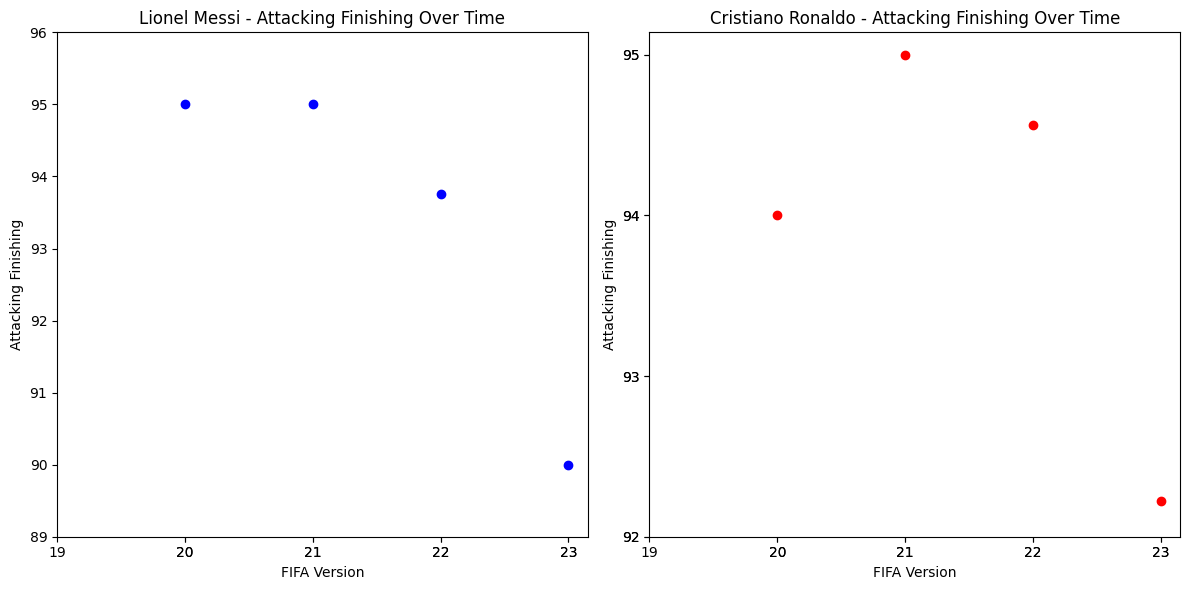

In [14]:
# Partial string matching for player names
messi = df[df['short_name'].str.contains('L. Messi', case=False, na=False)]
ronaldo = df[df['short_name'].str.contains('Cristiano Ronaldo', case=False, na=False)]

# Check if any data was found for the players
if messi.empty or ronaldo.empty:
    print("Data not found for one or both of the players.")
else:
    # Extract individual ratings for Messi and Ronaldo
    messi_ratings = messi[['fifa_version', 'attacking_finishing']]
    ronaldo_ratings = ronaldo[['fifa_version', 'attacking_finishing']]
    
    # Group the data by FIFA version and aggregate the ratings
    messi_grouped = messi_ratings.groupby('fifa_version')['attacking_finishing'].mean().reset_index()
    ronaldo_grouped = ronaldo_ratings.groupby('fifa_version')['attacking_finishing'].mean().reset_index()
    
    # Create scatter plots for Messi and Ronaldo
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.scatter(messi_grouped['fifa_version'], messi_grouped['attacking_finishing'], c='blue', label='Lionel Messi')
    plt.title('Lionel Messi - Attacking Finishing Over Time')
    plt.xlabel('FIFA Version')
    plt.ylabel('Attacking Finishing')
    # Set the x-axis tick values to integers only
    plt.xticks([int(x) for x in plt.xticks()[0]])
    plt.yticks([int(y) for y in plt.yticks()[0]])
    
    plt.subplot(122)
    plt.scatter(ronaldo_grouped['fifa_version'], ronaldo_grouped['attacking_finishing'], c='red', label='Cristiano Ronaldo')
    plt.title('Cristiano Ronaldo - Attacking Finishing Over Time')
    plt.xlabel('FIFA Version')
    plt.ylabel('Attacking Finishing')
    # Set the x-axis tick values to integers only
    plt.xticks([int(x) for x in plt.xticks()[0]])
    plt.yticks([int(y) for y in plt.yticks()[0]])
    
    plt.tight_layout()
    plt.show()


### Overall Player Rating Distribution

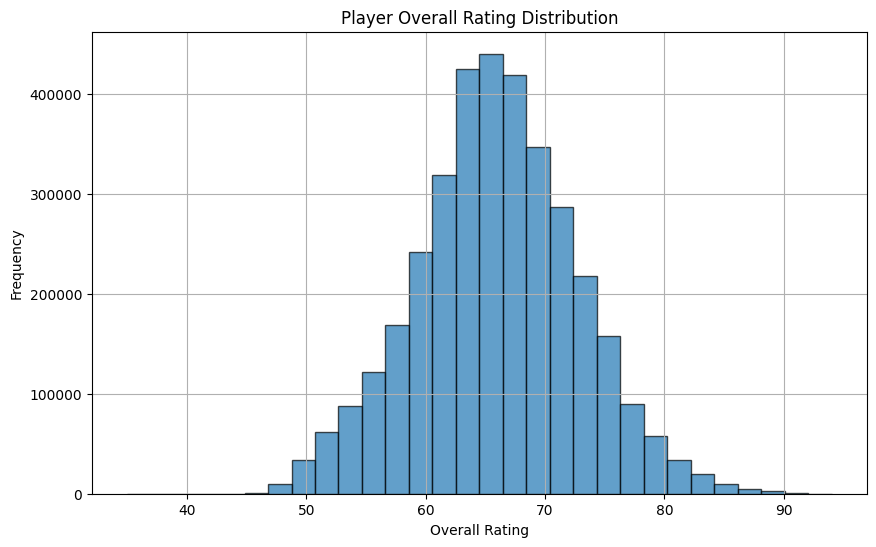

In [15]:
# Load the FIFA dataset
fifa_data = pd.read_csv('male_players_23.csv')

# Create a histogram of player overall ratings
plt.figure(figsize=(10, 6))
plt.hist(fifa_data['overall'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Player Overall Rating Distribution')
plt.grid(True)

# Show the plot
plt.show()


### Top 10 Nationality Distribution of Players

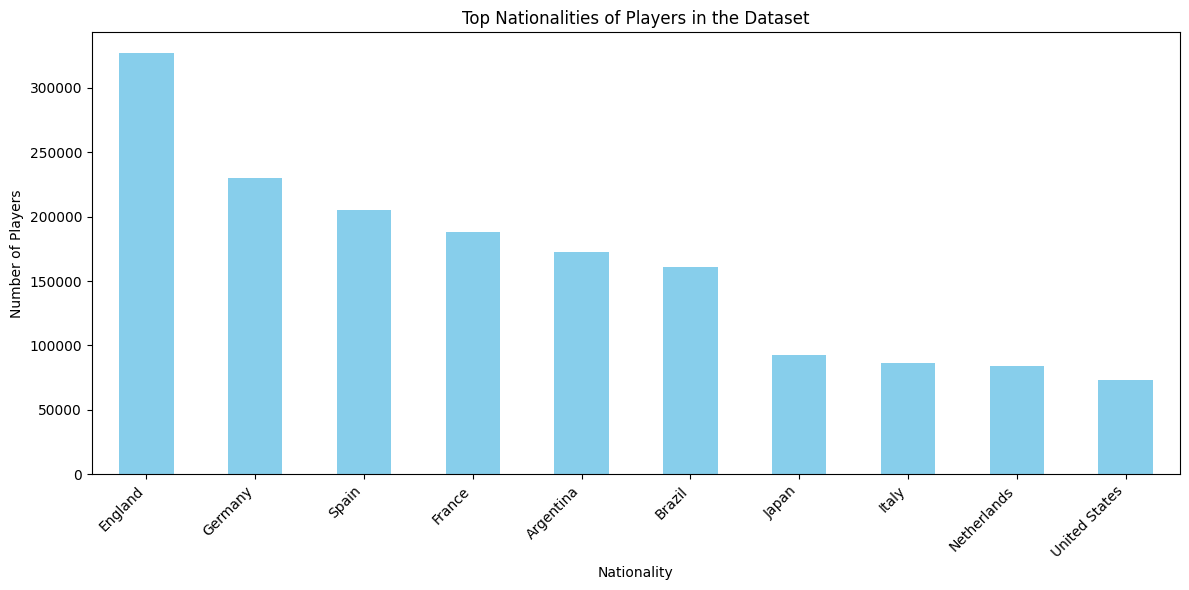

In [16]:
# Load the FIFA dataset
fifa_data = pd.read_csv('male_players_23.csv')

# Group the data by nationality and count the number of players for each nationality
nationality_counts = fifa_data['nationality_name'].value_counts().head(10)  # Adjust the number as needed

# Create a bar chart for the top nationalities
plt.figure(figsize=(12, 6))
nationality_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.title('Top Nationalities of Players in the Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


### Correlation Heatmap Between Player Attributes

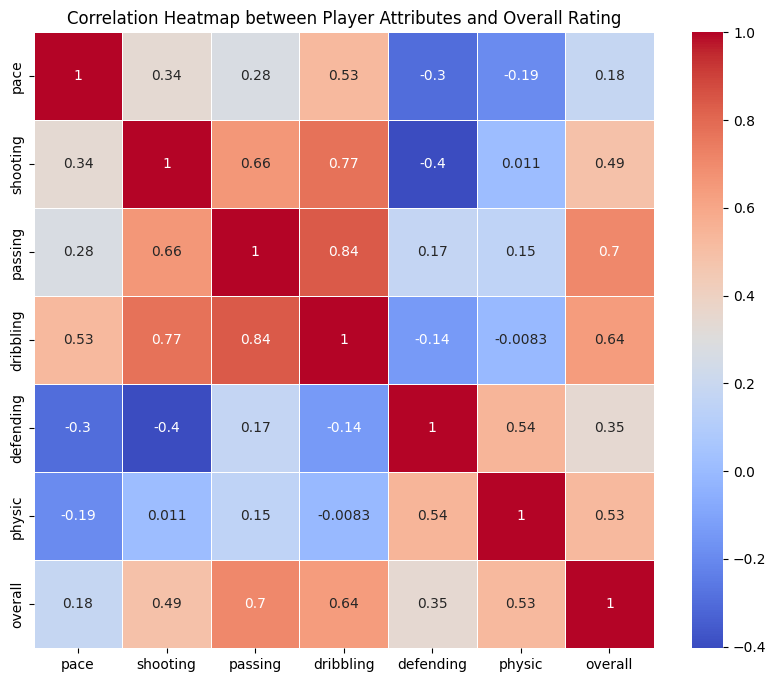

In [17]:
# Load the FIFA dataset
fifa_data = pd.read_csv('male_players_23.csv')

# Select the columns representing player attributes and overall rating
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall']
data_subset = fifa_data[attributes]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Player Attributes and Overall Rating')
plt.show()


### Player Nationality Distribution on World Map

C:\Users\cztop\AppData\Local\Temp\ipykernel_6448\3114942667.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Python311\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


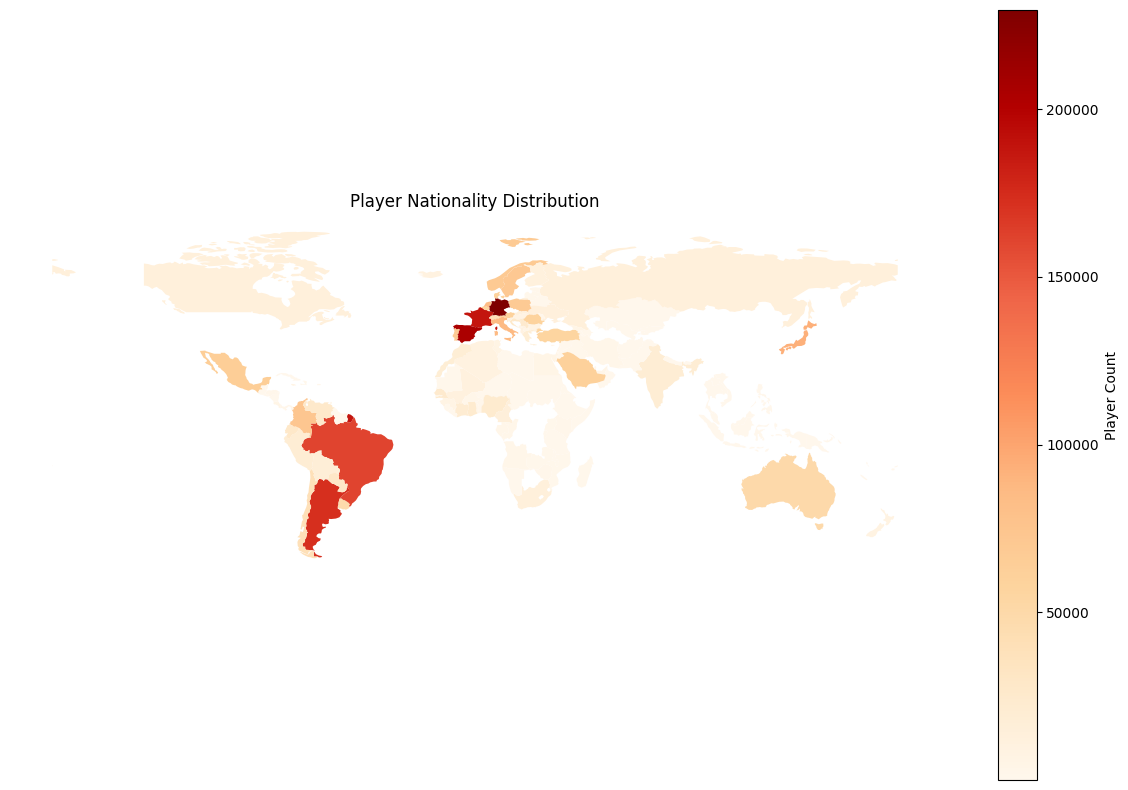

In [18]:
# Load the FIFA dataset
fifa_data = pd.read_csv('male_players_23.csv') 

# Group players by nationality and count the number of players for each nationality
nationality_counts = fifa_data['nationality_name'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Player Count']

# Load a world map shapefile using Geopandas
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the nationality counts with the world map data
merged_data = world_map.set_index('name').join(nationality_counts.set_index('Nationality'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Player Count', cmap='OrRd', linewidth=0.8, ax=ax, legend=True, legend_kwds={'label': "Player Count"})
ax.set_title('Player Nationality Distribution')
plt.axis('off')  # Turn off the axis
plt.show()


### Average Overall vs Potentional Ratings

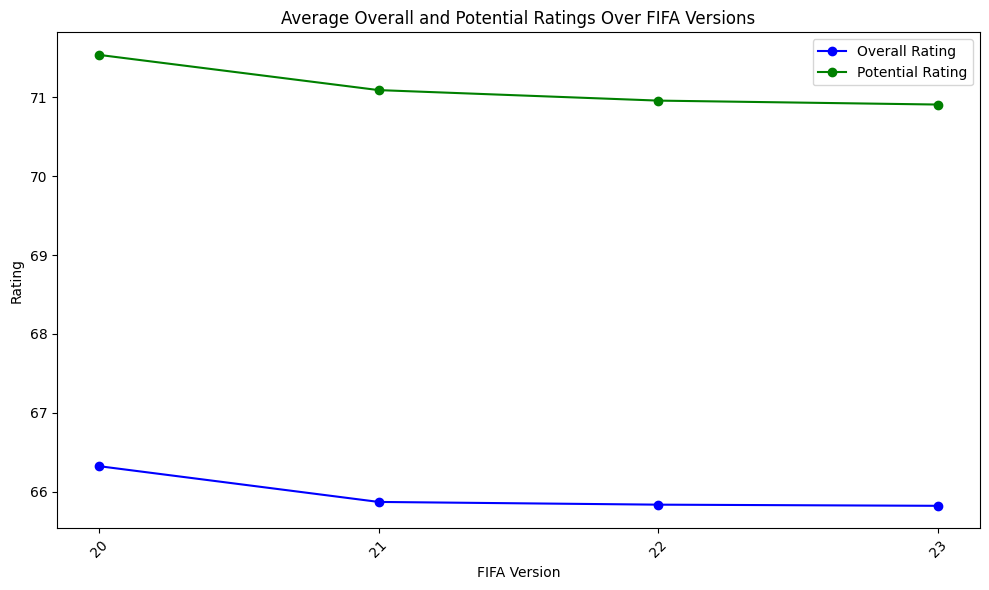

In [19]:
# Load the FIFA dataset
fifa_data = pd.read_csv('male_players_23.csv') 

# Group data by FIFA version and calculate the average overall and potential ratings
version_ratings = fifa_data.groupby('fifa_version')[['overall', 'potential']].mean().reset_index()

# Create a line chart for both Overall and Potential Ratings on the same graph
plt.figure(figsize=(10, 6))

# Plot Average Overall Rating in blue
plt.plot(version_ratings['fifa_version'], version_ratings['overall'], marker='o', linestyle='-', color='blue', label='Overall Rating')

# Plot Average Potential Rating in green
plt.plot(version_ratings['fifa_version'], version_ratings['potential'], marker='o', linestyle='-', color='green', label='Potential Rating')

# Add labels and legend
plt.title('Average Overall and Potential Ratings Over FIFA Versions')
plt.xlabel('FIFA Version')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.legend()
# Customize X-axis ticks to remove .5 increments
x_ticks = version_ratings['fifa_version'].unique()
plt.xticks(x_ticks, rotation=45)

plt.tight_layout()
plt.show()


### PREMIER LEAGUE SQUAD BUILDER

#### Identify All Premier League Players

In [20]:
# Load the FIFA dataset
fifa_data = pd.read_csv('male_players_23.csv')

# Create a new DataFrame containing players in the Premier League for FIFA version 23
premier_league_players_23 = fifa_data[(fifa_data['league_name'] == 'Premier League') & (fifa_data['fifa_version'] == 23)]

# Display the new table
print(premier_league_players_23)


        player_id                                         player_url  \
3          192985              /player/192985/kevin-de-bruyne/230009   
6          209331                /player/209331/mohamed-salah/230009   
9          200145  /player/200145/carlos-henrique-venancio-casimi...   
11         202126                   /player/202126/harry-kane/230009   
12         203376              /player/203376/virgil-van-dijk/230009   
...           ...                                                ...   
166109     271191                /player/271191/joe-whitworth/230001   
166157     256323                /player/256323/karabo-molefe/230001   
166222     265527                /player/265527/oliver-tipton/230001   
166372     264344             /player/264344/kopano-thuntsane/230001   
166535     268630                  /player/268630/isaac-price/230001   

        fifa_version  fifa_update fifa_update_date    short_name  \
3                 23            9       2023-01-13  K. De Bruyne   

#### Best Overall Premier League Squad Build

In [21]:
import pandas as pd
from IPython.display import display, HTML

# Load the FIFA dataset
fifa_data = pd.read_csv('male_players_23.csv') 

# Filter players from the Premier League for FIFA version 23
premier_league_players_23 = fifa_data[(fifa_data['league_name'] == 'Premier League') & (fifa_data['fifa_version'] == 23)]

# Define the budget constraint
budget = 100000000000000  # Adjust this budget as needed

# Define the positions
positions = ['ST', 'ST', 'LW', 'RW', 'CM', 'CM', 'LB', 'RB', 'CB', 'CB', 'GK']

# Create an empty list to store the selected players
selected_players = []
selected_player_ids = set()  # To keep track of selected player IDs

# Iterate through positions and select the best player within the budget for each position
for position in positions:
    eligible_players = premier_league_players_23[
        premier_league_players_23['player_positions'].str.split(', ').apply(lambda x: position in x if isinstance(x, list) else False)
    ]

    # Remove players that have already been selected
    eligible_players = eligible_players[~eligible_players['player_id'].isin(selected_player_ids)]

    if eligible_players.empty:
        print(f"No eligible players found for position: {position}")
        continue

    # Sort eligible players by overall rating in descending order
    eligible_players = eligible_players.sort_values(by='overall', ascending=False)

    # Find the best player within the budget
    best_player = None
    for _, player in eligible_players.iterrows():
        if player['value_eur'] <= budget:
            best_player = player
            break

    if best_player is not None:
        selected_players.append(best_player)
        selected_player_ids.add(best_player['player_id'])
        budget -= best_player['value_eur']
    else:
        print(f"No player found within budget for position: {position}")

# Create a DataFrame from the selected players
selected_players_df = pd.DataFrame(selected_players)

# Convert the DataFrame to an HTML table
html_table = selected_players_df.to_html(index=False)

# Display the HTML table
display(HTML(html_table))


player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
20801,/player/20801/c-ronaldo-dos-santos-aveiro/230006,23,6,2022-11-16,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,90,90,41000000.0,220000.0,37,1985-02-05,187,83,13.0,Premier League,1.0,11.0,Manchester United,SUB,7.0,NaN,2021-08-27,2023.0,38.0,Portugal,1354.0,ST,7.0,Right,4.0,5.0,5.0,High/Low,Unique,Yes,77900000.0,"#Aerial Threat, #Distance Shooter, #Clinical Finisher, #Complete Forward","Power Free-Kick, Flair, Long Shot Taker (AI), Outside Foot Shot",81.0,91.0,78.0,85.0,34.0,73.0,78.0,92.0,90.0,80.0,85.0,84.0,81.0,79.0,75.0,88.0,79.0,82.0,77.0,93.0,67.0,93.0,95.0,74.0,75.0,90.0,63.0,29.0,94.0,76.0,90.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,NaN,89+1,89+1,89+1,85,87,87,87,85,84+3,84+3,84+3,83+3,77+3,77+3,77+3,83+3,61+3,59+3,59+3,59+3,61+3,58+3,53+3,53+3,53+3,58+3,20+3,https://cdn.sofifa.net/players/020/801/23_120.png
202126,/player/202126/harry-kane/230009,23,9,2023-01-13,H. Kane,Harry Kane,ST,89,89,105500000.0,240000.0,28,1993-07-28,188,89,13.0,Premier League,1.0,18.0,Tottenham Hotspur,ST,10.0,NaN,2010-07-28,2024.0,14.0,England,1318.0,ST,9.0,Right,5.0,3.0,4.0,High/High,Unique,Yes,200500000.0,"#Distance Shooter, #Clinical Finisher","Leadership, Long Passer (AI), Long Shot Taker (AI), Playmaker (AI), Outside Foot Shot",69.0,91.0,83.0,83.0,47.0,82.0,80.0,93.0,85.0,84.0,87.0,83.0,82.0,65.0,86.0,86.0,67.0,70.0,68.0,92.0,73.0,92.0,79.0,83.0,83.0,86.0,80.0,44.0,94.0,87.0,92.0,92.0,50.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,NaN,87+2,87+2,87+2,84,86,86,86,84,85+3,85+3,85+3,84+3,82+3,82+3,82+3,84+3,67+3,68+3,68+3,68+3,67+3,63+3,61+3,61+3,61+3,63+3,20+3,https://cdn.sofifa.net/players/202/126/23_120.png
200104,/player/200104/heung-min-son/230006,23,6,2022-11-16,H. Son,손흥민 孙兴慜,"LW, LM",89,89,101000000.0,240000.0,29,1992-07-08,183,78,13.0,Premier League,1.0,18.0,Tottenham Hotspur,LW,7.0,NaN,2015-08-28,2025.0,167.0,Korea Republic,NaN,NaN,NaN,Right,5.0,4.0,4.0,High/Medium,Unique,Yes,191900000.0,"#Dribbler, #Distance Shooter, #Clinical Finisher, #Complete Forward","Solid Player, Finesse Shot, Long Shot Taker (AI), Speed Dribbler (AI), Team Player",88.0,89.0,81.0,85.0,42.0,69.0,83.0,91.0,68.0,83.0,79.0,86.0,85.0,74.0,74.0,84.0,85.0,90.0,85.0,91.0,76.0,88.0,60.0,88.0,64.0,89.0,62.0,39.0,91.0,82.0,73.0,89.0,47.0,34.0,33.0,11.0,13.0,13.0,6.0,10.0,NaN,85+3,85+3,85+3,87,87,87,87,87,86+3,86+3,86+3,86+3,79+3,79+3,79+3,86+3,68+3,63+3,63+3,63+3,68+3,64+3,54+3,54+3,54+3,64+3,19+3,https://cdn.sofifa.net/players/200/104/23_120.png
209331,/player/209331/mohamed-salah/230009,23,9,2023-01-13,M. Salah,Mohamed Salah Ghaly,RW,90,90,115500000.0,270000.0,30,1992-06-15,175,71,13.0,Pr